### Project_Summary

**Domain: Semiconductor manufacturing process**


A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/
variables collected from sensors and or process measurement points. The measured signals contain a combination of useful information, irrelevant information as well as noise

If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs.

These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified

The purpose is to build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the 
features are required to build the model or not.


Tasks performed:

1. Importing and cleaning the data
2. EDA and visualisation
3. Data preprocessing
4. Model training, testing and tuning (Using all kinds of ML models and hyper paramter tuning)
5. Conclusion

**Importing the libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

In [2]:
#loading the data
df1=pd.read_csv("signal-data.csv")

In [3]:
df1.shape

(1567, 592)

In [4]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


There are 8 rows and 592 columns including with Pass/Fail column and Time column

In [5]:
df1.Time

0       2008-07-19 11:55:00
1       2008-07-19 12:32:00
2       2008-07-19 13:17:00
3       2008-07-19 14:43:00
4       2008-07-19 15:22:00
               ...         
1562    2008-10-16 15:13:00
1563    2008-10-16 20:49:00
1564    2008-10-17 05:26:00
1565    2008-10-17 06:01:00
1566    2008-10-17 06:07:00
Name: Time, Length: 1567, dtype: object

In [6]:
df1.dtypes.value_counts()

float64    590
object       1
int64        1
dtype: int64

In [7]:
#Dropping the time column
df1.drop('Time',axis=1,inplace=True)

**Finding the columns which have standard deviation as 0 i.e.; single value throughout the column**

In [8]:
df_temp=pd.DataFrame(df1.std()==0)

In [9]:
df_temp.value_counts()

False    475
True     116
dtype: int64

It can be understood that there are 116 columns which have std as 0, i.e.; single constant values in the columns

In [10]:
df_temp[(df_temp[0]==True)].index

Index(['5', '13', '42', '49', '52', '69', '97', '141', '149', '178',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=116)

These columns can be dropped as they are constants and variance is present across those columns' dimensions

In [11]:
#Before dropping the std =0 columns, replacing the null values with median
replace_median = lambda x: x.fillna(x.median())
df1 = df1.apply(replace_median,axis=0)

In [12]:
df_temp=pd.DataFrame(df1.std()==0)

In [13]:
df_temp.value_counts()

False    475
True     116
dtype: int64

In [14]:
#Dropping the columns which have std=0
df1.drop(list(df_temp[(df_temp[0]==True)].index),axis=1,inplace=True)

In [15]:
df1.shape

(1567, 475)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 475 entries, 0 to Pass/Fail
dtypes: float64(474), int64(1)
memory usage: 5.7 MB


**Correlation among the columns will be verified, so that which have close correlation can be dropped to reduce the dimensions**

In [17]:
#Taking the absolute correlation matrix
df2_temp=df1.corr().abs()

In [18]:
df2_temp.drop('Pass/Fail',inplace=True,axis=1)

In [19]:
num_arr=[]
for col in df2_temp.columns:
    #if int(col)<=295:
        #print((df2_temp[(df2_temp[col]>=0.95)]).index)
    if((df2_temp[col]>=0.95).any):
        if((len((df2_temp[(df2_temp[col]>=0.95)]).index))==1):
                #the diagonal correlation indexes are not considered
            pass
        else:
            #Indices will be returned in the ascending order, so leaving the first one always
            num_arr=num_arr+list(((df2_temp[(df2_temp[col]>=0.95)]).index)[1:])
            print(((df2_temp[(df2_temp[col]>=0.95)]).index)[0],list(((df2_temp[(df2_temp[col]>=0.95)]).index)[1:]))

4 ['140', '275']
16 ['148', '152', '283', '287', '421']
25 ['27']
25 ['27']
34 ['36']
34 ['36']
74 ['206', '209', '342', '347', '478']
92 ['105']
93 ['106']
94 ['96']
94 ['96']
99 ['104']
99 ['104']
92 ['105']
93 ['106']
109 ['244', '382', '516']
114 ['249', '387']
117 ['252', '390', '524']
122 ['127']
122 ['127']
135 ['408']
136 ['271', '409']
137 ['272', '410']
138 ['411']
139 ['274']
4 ['140', '275']
142 ['277', '415']
143 ['416']
144 ['279', '417']
145 ['280']
146 ['281']
147 ['282', '420']
16 ['148', '152', '283', '287', '421', '425', '427']
150 ['285']
151 ['286', '424']
16 ['148', '152', '283', '287', '421', '425']
153 ['288', '426']
154 ['289', '421', '427']
155 ['290', '428']
156 ['291', '429']
157 ['292']
158 ['293']
159 ['294']
160 ['295']
161 ['296']
162 ['297']
163 ['298']
164 ['165', '299', '300']
164 ['165', '299', '300']
166 ['301', '437']
167 ['302']
168 ['303']
169 ['304', '440']
170 ['305', '441']
171 ['306', '442']
172 ['174', '307', '309', '443', '445']
173 ['308',

In [20]:
#Removing the duplicates in the columns to be dropped
num_arr1=list(set(num_arr))

In [21]:
print(list(num_arr1))

['346', '309', '290', '96', '244', '567', '479', '206', '350', '334', '448', '446', '321', '541', '443', '105', '165', '300', '376', '553', '287', '286', '410', '354', '280', '390', '308', '518', '389', '545', '435', '340', '556', '344', '271', '297', '575', '429', '311', '282', '283', '298', '338', '391', '392', '577', '383', '355', '331', '152', '274', '148', '127', '494', '303', '437', '406', '442', '312', '561', '557', '517', '363', '275', '407', '342', '285', '366', '349', '493', '522', '393', '352', '426', '409', '585', '467', '36', '459', '351', '434', '281', '296', '272', '335', '408', '456', '520', '457', '360', '361', '454', '516', '302', '445', '441', '576', '306', '452', '470', '405', '527', '154', '209', '106', '252', '477', '246', '588', '347', '424', '307', '332', '386', '411', '436', '554', '174', '539', '305', '584', '277', '294', '245', '415', '362', '341', '469', '492', '523', '365', '387', '323', '279', '295', '491', '288', '475', '495', '519', '440', '27', '540', '

Dropping the columns which have more than 95% correlation

In [22]:
df1.drop(num_arr1,inplace=True,axis=1)

In [23]:
df1.shape

(1567, 284)

In [24]:
df1.describe()

,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.441551,2495.866110,2200.551958,1395.383474,4.171281,101.116476,0.121825,1.462860,-0.000842,0.000146,...,0.345636,0.020879,0.015600,82.403069,0.500096,0.015317,0.021458,0.016474,99.652345,-0.867262
std,73.480841,80.228143,29.380973,439.837330,56.103721,6.209385,0.008936,0.073849,0.015107,0.009296,...,0.248478,0.007387,0.006132,56.348694,0.003403,0.017174,0.012354,0.008805,93.864558,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,...,0.066700,-0.016900,0.003200,0.000000,0.477800,0.006000,-0.016900,0.003200,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,97.937800,0.121100,1.411250,-0.010800,-0.005600,...,0.242250,0.020400,0.014800,72.288900,0.497900,0.011600,0.013450,0.010600,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,101.512200,0.122400,1.461600,-0.001300,0.000400,...,0.293400,0.020400,0.014800,72.288900,0.500200,0.013800,0.020500,0.014800,71.900500,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,104.530000,0.123800,1.516850,0.008400,0.005900,...,0.366900,0.020400,0.014800,72.288900,0.502350,0.016500,0.027600,0.020300,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,2.196700,0.102800,0.079900,737.304800,0.509800,0.476600,0.102800,0.079900,737.304800,1.000000


In [25]:
df1.corr()

,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,1.000000,-0.144161,0.004667,-0.006665,-0.010819,0.002028,0.031347,-0.052735,0.009091,0.006445,...,-0.002035,-0.026802,-0.055462,-0.035265,0.000190,0.023562,0.018534,-0.025867,0.004185,-0.025100
1,-0.144161,1.000000,0.005883,-0.008963,-0.001917,-0.025222,-0.011761,0.031244,0.024025,0.009529,...,-0.011468,-0.009203,0.052693,0.059246,0.043754,0.002863,-0.009430,0.017056,0.044552,-0.002542
2,0.004667,0.005883,1.000000,0.298810,0.095881,-0.136212,-0.147116,0.023524,0.016248,0.069902,...,-0.030714,-0.015210,-0.006915,0.006371,-0.005971,0.015694,-0.025506,-0.029287,-0.032763,-0.000999
3,-0.006665,-0.008963,0.298810,1.000000,-0.058351,-0.685773,0.086965,-0.102839,0.066987,0.049785,...,0.013742,0.020311,-0.039886,-0.054101,0.008305,0.025288,0.035164,-0.039196,-0.080942,-0.024014
4,-0.010819,-0.001917,0.095881,-0.058351,1.000000,-0.074395,-0.343413,-0.025933,0.053973,-0.006496,...,-0.016415,-0.069445,-0.037374,0.099932,0.044943,-0.001331,-0.043831,-0.031012,0.050792,-0.013633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.023562,0.002863,0.015694,0.025288,-0.001331,-0.039425,0.010378,0.017336,-0.036119,0.039193,...,-0.022777,0.013227,-0.001946,0.002892,-0.190091,1.000000,0.002258,-0.002566,-0.002928,0.005996
586,0.018534,-0.009430,-0.025506,0.035164,-0.043831,-0.041299,0.058019,0.010418,0.033700,0.000329,...,-0.013498,0.594886,0.146409,-0.273951,-0.016729,0.002258,1.000000,0.167920,-0.486530,0.004170
587,-0.025867,0.017056,-0.029287,-0.039196,-0.031012,0.034113,-0.021518,0.022793,0.059181,0.046995,...,-0.018881,0.171216,0.683461,0.272827,-0.024507,-0.002566,0.167920,1.000000,0.390834,0.035423
589,0.004185,0.044552,-0.032763,-0.080942,0.050792,0.044039,-0.107904,-0.022864,0.004670,0.008462,...,-0.027130,-0.278523,0.226536,0.567313,0.041449,-0.002928,-0.486530,0.390834,1.000000,-0.002603


In [26]:
# Just checking 95% above correlated columns are removed
df2_temp=df1.corr().abs()
for col in df2_temp.columns[:-1]:
    print((df2_temp[(df2_temp[col]>=0.95)]).index)

Index(['0'], dtype='object')
Index(['1'], dtype='object')
Index(['2'], dtype='object')
Index(['3'], dtype='object')
Index(['4'], dtype='object')
Index(['6'], dtype='object')
Index(['7'], dtype='object')
Index(['8'], dtype='object')
Index(['9'], dtype='object')
Index(['10'], dtype='object')
Index(['11'], dtype='object')
Index(['12'], dtype='object')
Index(['14'], dtype='object')
Index(['15'], dtype='object')
Index(['16'], dtype='object')
Index(['17'], dtype='object')
Index(['18'], dtype='object')
Index(['19'], dtype='object')
Index(['20'], dtype='object')
Index(['21'], dtype='object')
Index(['22'], dtype='object')
Index(['23'], dtype='object')
Index(['24'], dtype='object')
Index(['25'], dtype='object')
Index(['26'], dtype='object')
Index(['28'], dtype='object')
Index(['29'], dtype='object')
Index(['30'], dtype='object')
Index(['31'], dtype='object')
Index(['32'], dtype='object')
Index(['33'], dtype='object')
Index(['34'], dtype='object')
Index(['35'], dtype='object')
Index(['37'], dtype

No columns have more than 95% correlation now

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 284 entries, 0 to Pass/Fail
dtypes: float64(283), int64(1)
memory usage: 3.4 MB


In [28]:
df1['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

This Data is highly imbalanced

Replacing the 1 with 0 and -1 with 1, for convenience, so now 1 is Pass and 0 is Fail

In [29]:
df1=df1.replace({'Pass/Fail': {1:0,-1:1}})

In [30]:
df1.head()

,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.3157,0.0204,0.0148,72.2889,0.5005,0.0118,0.0205,0.0148,71.9005,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.2653,0.0096,0.0201,208.2045,0.5019,0.0223,0.0096,0.0201,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.1882,0.0584,0.0484,82.8602,0.4958,0.0157,0.0584,0.0484,82.8602,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.1738,0.0202,0.0149,73.8432,0.4990,0.0103,0.0202,0.0149,73.8432,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.2224,0.0204,0.0148,72.2889,0.4800,0.4766,0.0202,0.0149,73.8432,1


In [31]:
#Checking the value_counts, it must be same as earlier
df1['Pass/Fail'].value_counts()

1    1463
0     104
Name: Pass/Fail, dtype: int64

This data is imbalanced, it will be taken care later in this file

**Taking some random columns and performing EDA**

<AxesSubplot:xlabel='Pass/Fail', ylabel='12'>

<Figure size 1728x720 with 0 Axes>

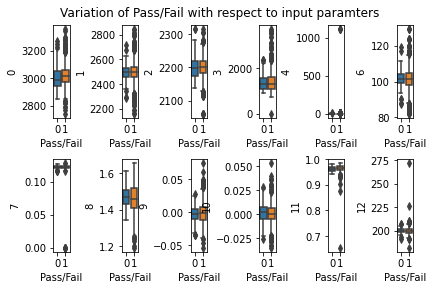

In [32]:
plt.figure(figsize=(24,10))
fig, ax = plt.subplots(2, 6)
fig.tight_layout(pad=2.0)
fig.suptitle("Variation of Pass/Fail with respect to input paramters")

sns.boxplot(data=df1,x='Pass/Fail',y='0',ax=ax[0,0])
sns.boxplot(data=df1,x='Pass/Fail',y='1',ax=ax[0,1])
sns.boxplot(data=df1,x='Pass/Fail',y='2',ax=ax[0,2])
sns.boxplot(data=df1,x='Pass/Fail',y='3',ax=ax[0,3])
sns.boxplot(data=df1,x='Pass/Fail',y='4',ax=ax[0,4])
sns.boxplot(data=df1,x='Pass/Fail',y='6',ax=ax[0,5])
sns.boxplot(data=df1,x='Pass/Fail',y='7',ax=ax[1,0])
sns.boxplot(data=df1,x='Pass/Fail',y='8',ax=ax[1,1])
sns.boxplot(data=df1,x='Pass/Fail',y='9',ax=ax[1,2])
sns.boxplot(data=df1,x='Pass/Fail',y='10',ax=ax[1,3])
sns.boxplot(data=df1,x='Pass/Fail',y='11',ax=ax[1,4])
sns.boxplot(data=df1,x='Pass/Fail',y='12',ax=ax[1,5])

From the above box plots of first 12 columns, it can be understood that the samples which are of PASS status have more outliers in all the 12 boxplots

**Segregate predictors vs target attributes**

In [33]:
X=df1.drop('Pass/Fail',axis=1)
Y=df1['Pass/Fail']

**Performing Train-Test split**

In [34]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

**Using GridSearch along with pipeline to check different models with tuning the parameters**

**Standardisation and correction of data imbalance is taken care in the pipeline**

Checking how many PCA components are need to cover 90% variance

In [35]:
X_sc = pd.DataFrame(StandardScaler().fit_transform(X_train))

In [36]:
pca_model = PCA(n_components=130)
pca_model.fit(X_sc)
np.cumsum(pca_model.explained_variance_ratio_)

array([0.05121988, 0.0871331 , 0.11410496, 0.14023767, 0.15838294,
       0.17526417, 0.19103999, 0.20601777, 0.22038041, 0.23397447,
       0.24728853, 0.26049742, 0.2732881 , 0.2852644 , 0.29698676,
       0.30817569, 0.31906719, 0.3295989 , 0.33989993, 0.35008674,
       0.36012792, 0.37001367, 0.37967024, 0.38907523, 0.39818665,
       0.40725687, 0.41605685, 0.42459174, 0.43310295, 0.44150393,
       0.44973758, 0.45790303, 0.46570719, 0.47339629, 0.48102165,
       0.48846139, 0.49585327, 0.50319472, 0.51037524, 0.51751951,
       0.52438549, 0.53115573, 0.53784834, 0.54452424, 0.55102463,
       0.55740398, 0.56363431, 0.56982238, 0.57587571, 0.58187631,
       0.58775625, 0.59353953, 0.59926226, 0.6048962 , 0.61044825,
       0.61590441, 0.62130904, 0.62663214, 0.63190456, 0.63712627,
       0.64228887, 0.64730495, 0.65231828, 0.65722794, 0.66205933,
       0.66678559, 0.6714711 , 0.67599915, 0.68051021, 0.68498849,
       0.68943559, 0.69384173, 0.6981519 , 0.70238753, 0.70658

Generic Grid_Search function to get the best models of different types

In [37]:
#Grid Search function to be called different models and parameters
def Grid_Search_CV(X,y,model, param):
    gs_model=GridSearchCV(estimator=model,param_grid=param,cv=10)
    gs_model.fit(X,y)
    best_params=gs_model.best_params_
    return gs_model.best_estimator_,best_params

**Using Grid search and pipeline for Logistic Regression**

In [219]:
Lr_pip = Pipeline([('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),('pca', PCA()), ('classification', LogisticRegression(max_iter=1000))])
Lr_param_grid={'pca__n_components':[130],'classification__C':[0.1, 1.0, 10.0, 100.0]}

In [220]:
Lr_model, Lr_best_params = Grid_Search_CV(X_train,y_train, Lr_pip, Lr_param_grid)
print(Lr_model)

Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=130)),
                ('classification', LogisticRegression(C=100.0, max_iter=1000))])


In [221]:
acc_Lr=Lr_model.score(X_train,y_train)
acc_val_Lr=Lr_model.score(X_test,y_test)
Lr_predict=Lr_model.predict(X_test)
f1_Lr=f1_score(y_test,Lr_predict,average='micro')
print(acc_Lr,acc_val_Lr,f1_Lr)

0.8914604948124502 0.7738853503184714 0.7738853503184715


In [222]:
print(classification_report(y_test, Lr_predict, digits=2))

              precision    recall  f1-score   support

           0       0.07      0.19      0.10        21
           1       0.93      0.82      0.87       293

    accuracy                           0.77       314
   macro avg       0.50      0.50      0.49       314
weighted avg       0.88      0.77      0.82       314



**Using Grid search and pipeline for DecisionTreeClassifier**

In [223]:
Dt_pip = Pipeline([('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)), ('pca', PCA()),('Dtc', DecisionTreeClassifier())])
Dt_param_grid={'pca__n_components':[130],'Dtc__criterion':['gini','entropy'],'Dtc__max_depth':np.arange(5,20)}

In [224]:
Dt_model, Dt_best_params = Grid_Search_CV(X_train,y_train, Dt_pip, Dt_param_grid)
print(Dt_model)

Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=130)),
                ('Dtc',
                 DecisionTreeClassifier(criterion='entropy', max_depth=13))])


In [225]:
acc_Dt=Dt_model.score(X_train,y_train)
acc_val_Dt=Dt_model.score(X_test,y_test)
Dt_predict=Dt_model.predict(X_test)
f1_Dt=f1_score(y_test,Dt_predict,average='micro')
print(acc_Dt,acc_val_Dt,f1_Dt)

0.9736632083000798 0.856687898089172 0.856687898089172


In [226]:
print(classification_report(y_test, Dt_predict, digits=2))

              precision    recall  f1-score   support

           0       0.07      0.10      0.08        21
           1       0.93      0.91      0.92       293

    accuracy                           0.86       314
   macro avg       0.50      0.50      0.50       314
weighted avg       0.88      0.86      0.87       314



**Using Grid search and pipeline for BaggingClassifier**

In [227]:
Bgg_pip = Pipeline([('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),('pca', PCA()), ('Bgg', BaggingClassifier())])
Bgg_param_grid={'pca__n_components':[130],'Bgg__n_estimators':[10,50,100],'Bgg__random_state':[1]}

In [228]:
Bgg_model, Bgg_best_params = Grid_Search_CV(X_train,y_train, Bgg_pip, Bgg_param_grid)
print(Bgg_model)

Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=130)),
                ('Bgg', BaggingClassifier(n_estimators=100, random_state=1))])


In [229]:
acc_Bgg=Bgg_model.score(X_train,y_train)
acc_val_Bgg=Bgg_model.score(X_test,y_test)
Bgg_predict=Bgg_model.predict(X_test)
f1_Bgg=f1_score(y_test,Bgg_predict,average='micro')
print(acc_Bgg,acc_val_Bgg,f1_Bgg)

1.0 0.9267515923566879 0.9267515923566879


In [230]:
print(classification_report(y_test, Bgg_predict, digits=2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      0.99      0.96       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



**Using Grid search and pipeline for GradientBoostingClassifier**

In [231]:
Gb_pip = Pipeline([('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),('pca', PCA()), ('Gb', GradientBoostingClassifier())])
Gb_param_grid={'pca__n_components':[130],'Gb__learning_rate':[0.01,0.05,0.1,0.2],'Gb__n_estimators':[50,100,200]}

In [232]:
Gb_model, Gb_best_params = Grid_Search_CV(X_train,y_train, Gb_pip, Gb_param_grid)
print(Gb_model)

Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=130)),
                ('Gb', GradientBoostingClassifier(n_estimators=200))])


In [233]:
acc_Gb=Gb_model.score(X_train,y_train)
acc_val_Gb=Gb_model.score(X_test,y_test)
Gb_predict=Gb_model.predict(X_test)
f1_Gb=f1_score(y_test,Gb_predict,average='micro')
print(acc_Gb,acc_val_Gb,f1_Gb)

1.0 0.9267515923566879 0.9267515923566879


In [234]:
print(classification_report(y_test, Gb_predict, digits=2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      0.99      0.96       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



**Using Grid search and pipeline for AdaBoostClassifier**

In [235]:
Ab_pip = Pipeline([('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),('pca', PCA()), ('Ab', AdaBoostClassifier())])
Ab_param_grid={'pca__n_components':[130],'Ab__learning_rate':[0.05,0.1,0.2,0.4],'Ab__n_estimators':[50,100,200,300],'Ab__random_state':[1]}

In [236]:
Ab_model, Ab_best_params = Grid_Search_CV(X_train,y_train, Ab_pip, Ab_param_grid)
print(Ab_model)

Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=130)),
                ('Ab',
                 AdaBoostClassifier(learning_rate=0.4, n_estimators=300,
                                    random_state=1))])


In [237]:
acc_Ab=Ab_model.score(X_train,y_train)
acc_val_Ab=Ab_model.score(X_test,y_test)
Ab_predict=Ab_model.predict(X_test)
f1_Ab=f1_score(y_test,Ab_predict,average='micro')
print(acc_Ab,acc_val_Ab,f1_Ab)

0.9960095770151636 0.9171974522292994 0.9171974522292994


In [238]:
print(classification_report(y_test, Ab_predict, digits=2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      0.98      0.96       293

    accuracy                           0.92       314
   macro avg       0.47      0.49      0.48       314
weighted avg       0.87      0.92      0.89       314



**Using Grid search and pipeline for RandomForestClassifier**

In [239]:
Rf_pip = Pipeline([('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),('pca', PCA()), ('Rf', RandomForestClassifier())])
Rf_param_grid={'pca__n_components':[130],'Rf__criterion':['gini','entropy'],'Rf__max_depth':np.arange(5,20),'Rf__n_estimators':[50,100,200],'Rf__random_state':[1]}

In [240]:
Rf_model, Rf_best_params = Grid_Search_CV(X_train,y_train, Rf_pip, Rf_param_grid)
print(Rf_model)

Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=130)),
                ('Rf', RandomForestClassifier(max_depth=9, random_state=1))])


In [241]:
acc_Rf=Rf_model.score(X_train,y_train)
acc_val_Rf=Rf_model.score(X_test,y_test)
Rf_predict=Rf_model.predict(X_test)
f1_Rf=f1_score(y_test,Rf_predict,average='micro')
print(acc_Rf,acc_val_Rf,f1_Rf)

1.0 0.9331210191082803 0.9331210191082803


In [242]:
print(classification_report(y_test, Rf_predict, digits=2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      1.00      0.97       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



c:\users\200488052\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\200488052\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\200488052\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

**Using Grid search and pipeline for XGBClassifier**

In [243]:
XGB_pip = Pipeline([('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)), ('pca', PCA()),('XGB', XGBClassifier())])
XGB_param_grid={'pca__n_components':[130],'XGB__learning_rate':[0.05,0.1,0.2],'XGB__max_depth':np.arange(5,20),'XGB__n_estimators':[50,100,200],'XGB__random_state':[1],'XGB__use_label_encoder':[False]}

In [244]:
import warnings
warnings.simplefilter('ignore')
XGB_model, XGB_best_params = Grid_Search_CV(X_train,y_train, XGB_pip, XGB_param_grid)
print(XGB_model)

[15:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [245]:
acc_XGB=XGB_model.score(X_train,y_train)
acc_val_XGB=XGB_model.score(X_test,y_test)
XGB_predict=XGB_model.predict(X_test)
f1_XGB=f1_score(y_test,XGB_predict,average='micro')
print(acc_XGB,acc_val_XGB,f1_XGB)

0.9984038308060654 0.9267515923566879 0.9267515923566879


In [246]:
print(classification_report(y_test, XGB_predict, digits=2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      0.99      0.96       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



**Using Grid search and pipeline for Knn Classifier**

In [38]:
Knn_pip = Pipeline([('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),('pca', PCA()), ('Knn', KNeighborsClassifier())])
Knn_param_grid={'pca__n_components':[150],'Knn__n_neighbors':np.arange(3,20,2)}

In [39]:
Knn_model, Knn_best_params = Grid_Search_CV(X_train,y_train, Knn_pip, Knn_param_grid)
print(Knn_model)

Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=150)),
                ('Knn', KNeighborsClassifier(n_neighbors=3))])


In [40]:
acc_Knn=Knn_model.score(X_train,y_train)
acc_val_Knn=Knn_model.score(X_test,y_test)
Knn_predict=Knn_model.predict(X_test)
f1_Knn=f1_score(y_test,Knn_predict,average=None)
print(acc_Knn,acc_val_Knn,f1_Knn)

0.7254588986432562 0.5509554140127388 [0.20338983 0.68736142]


In [41]:
print(classification_report(y_test, Knn_predict, digits=2))

              precision    recall  f1-score   support

           0       0.12      0.86      0.20        21
           1       0.98      0.53      0.69       293

    accuracy                           0.55       314
   macro avg       0.55      0.69      0.45       314
weighted avg       0.92      0.55      0.65       314



Comparing the all the models and choosing the best

In [270]:
acc_dict={'Model':['Log_Reg','Dec_T','Bagg','Grad_b','Ada_b','Rand_f','XG_b','Knn'],
          'Train_Acc':[acc_Lr, acc_Dt, acc_Bgg, acc_Gb, acc_Ab, acc_Rf, acc_XGB, acc_Knn],
          'Test_Acc':[acc_val_Lr, acc_val_Dt, acc_val_Bgg, acc_val_Gb, acc_val_Ab, acc_val_Rf, acc_val_XGB, acc_val_Knn],
          'F1_Score':[f1_Lr, f1_Dt, f1_Bgg, f1_Gb, f1_Ab, f1_Rf, f1_XGB, f1_Knn]}

acc_dict_df=pd.DataFrame(acc_dict)
acc_dict_df=acc_dict_df.set_index('Model')
print(acc_dict_df)

         Train_Acc  Test_Acc                                   F1_Score
Model                                                                  
Log_Reg   0.891460  0.773885                                   0.773885
Dec_T     0.973663  0.856688                                   0.856688
Bagg      1.000000  0.926752                                   0.926752
Grad_b    1.000000  0.926752                                   0.926752
Ada_b     0.996010  0.917197                                   0.917197
Rand_f    1.000000  0.933121                                   0.933121
XG_b      0.998404  0.926752                                   0.926752
Knn       0.757299  0.588110  [0.20491803278688528, 0.7220630372492837]


Note: Only knn classifier is executed latest, so those values doesn't match with the above table knn values. Because of execution time, remaining all modesl are not executed again. But they were executed and verified.

## Using different random state each time will lead to different samples in train and test data

**Considering only logistic classifier to check the different samples effectiveness**

In [252]:
acc_CV=[0]*6
acc_val_CV=[0]*6
print(acc_CV)

[0, 0, 0, 0, 0, 0]


In [253]:
for i in np.arange(0,6):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    CV_pip = Pipeline([('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),('pca', PCA()), ('classification', LogisticRegression(max_iter=1000))])
    CV_param_grid={'pca__n_components':[10,20],'classification__C':[0.1, 1.0, 10.0, 100.0]}
    CV_model, CV_best_params = Grid_Search_CV(X_train,y_train, CV_pip, CV_param_grid)
    print(CV_model)
    acc_CV[i]=CV_model.score(X_train,y_train)
    acc_val_CV[i]=CV_model.score(X_test,y_test)
    
print("Train and Test accuracies for different random states:")
print(pd.DataFrame({'Train Accuracy':acc_CV,'Test Accuracy':acc_val_CV}))

Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=20)),
                ('classification', LogisticRegression(max_iter=1000))])
Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=20)),
                ('classification', LogisticRegression(C=10.0, max_iter=1000))])
Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=20)),
                ('classification', LogisticRegression(C=100.0, max_iter=1000))])
Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=20)),
                ('classification', LogisticRegression(max_iter=1000))])
Pipeline(steps=[('scl', StandardScaler()), ('sampling', SMOTE(random_state=1)),
                ('pca', PCA(n_components=20)),
                ('classification', LogisticRegression(max_it

It can be seen that for different samples, train and test accuracies will change

**Using K fold to check different validation scores for the same model**

In [254]:
kfold = KFold(n_splits=50)
model = LogisticRegression(max_iter=10000)
results = cross_val_score(model, X, Y, cv=kfold)

In [255]:
print(results)
print("Accuracy: %.3f%% with standard deviation of %.3f%%" % (results.mean()*100.0, results.std()*100.0))

[0.78125    0.59375    0.8125     0.84375    0.75       0.84375
 0.6875     0.71875    0.875      0.78125    0.78125    0.9375
 0.875      0.9375     0.9375     0.9375     0.9375     1.
 0.93548387 0.96774194 0.96774194 1.         0.96774194 1.
 1.         0.87096774 0.93548387 0.93548387 0.96774194 0.90322581
 1.         1.         0.96774194 0.96774194 1.         0.96774194
 0.93548387 0.93548387 0.96774194 0.87096774 0.96774194 0.93548387
 0.80645161 0.90322581 0.93548387 0.93548387 0.96774194 1.
 0.93548387 1.        ]
Accuracy: 90.966% with standard deviation of 9.076%


From the above accuracies, it can be understood that when the k fold is used Accuracies are changing between minimum of 0.625 and a maximum of 1 with standard devaition of 8.494

So sampling has effect on the train and test accuracies

## Pickling the best model and unpickling

To improve the manufacturing process, it has to be found where the failures are more. So a good recall ratio is required for 'Fail' samples.So knn classifier will be taken

**Pickling the model into file**

In [66]:
pickle_model = open('finalized_model.pkl', 'wb')#Creating a file with write mode
pickle.dump(Knn_model,pickle_model)#Dumping the model into one file
pickle_model.close()#Closing the file

**Unpickling and loading**

In [67]:
pickle_model_1 = open('finalized_model.pkl', 'rb')
model_1=pickle.load(pickle_model_1)

In [68]:
#Reading the inputs of future prediction file
data = pd.read_excel("Future_predictions.xlsx")

In [69]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [70]:
#Taking the df1 columns which was processed earlier
df1.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '573', '578', '579', '581', '582', '583', '586', '587', '589',
       'Pass/Fail'],
      dtype='object', length=284)

In [71]:
data.columns

Index(['Time',      0,      1,      2,      3,      4,      5,      6,      7,
            8,
       ...
          580,    581,    582,    583,    584,    585,    586,    587,    588,
          589],
      dtype='object', length=591)

In [72]:
data.drop('Time',inplace=True, axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [73]:
#Taking the only columns which were present earlier and dropping other columns
col_to_drop=[]
for i in data.columns:
    if str(i) not in df1.columns:
        col_to_drop.append(i)
    else:
        pass
print(col_to_drop)

[5, 13, 27, 36, 42, 49, 52, 69, 96, 97, 104, 105, 106, 127, 140, 141, 148, 149, 152, 154, 165, 174, 178, 179, 186, 189, 190, 191, 192, 193, 194, 206, 209, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 244, 245, 246, 249, 252, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 271, 272, 274, 275, 276, 277, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 338, 339, 340, 341, 342, 343, 344, 346, 347, 349, 350, 351, 352, 353, 354, 355, 357, 359, 360, 361, 362, 363, 364, 365, 366, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 414, 415, 416, 417, 420, 421, 422, 424, 425, 426, 

In [74]:
df_new=data.drop(col_to_drop,axis=1)

In [75]:
#Checking null values
df_new.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
582    0
583    0
586    1
587    1
589    1
Length: 283, dtype: int64

In [76]:
#replacing the null values with median
df_new = df_new.replace(np.NaN,0)

In [77]:
df_new.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
582    0
583    0
586    0
587    0
589    0
Length: 283, dtype: int64

In [78]:
print(df_new.dtypes.value_counts())
print(df1.dtypes.value_counts())

float64    274
int64        9
dtype: int64
float64    283
int64        1
dtype: int64


In [79]:
df_new=df_new.astype('float64')

In [80]:
df_new.head()

,0,1,2,3,4,6,7,8,9,10,...,572,573,578,579,581,582,583,586,587,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,8.95,0.3157,0.0000,0.0000,0.0000,0.5005,0.0118,0.0000,0.0000,0.0000
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,5.92,0.2653,0.0096,0.0201,208.2045,0.5019,0.0223,0.0096,0.0201,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,11.21,0.1882,0.0584,0.0484,82.8602,0.4958,0.0157,0.0584,0.0484,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,9.33,0.1738,0.0202,0.0149,73.8432,0.4990,0.0103,0.0202,0.0149,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,8.83,0.2224,0.0000,0.0000,0.0000,0.4800,0.4766,0.0202,0.0149,73.8432


In [81]:
df_new.dtypes.value_counts()

float64    283
dtype: int64

In [82]:
#Predicting the outputs
predicted_value=model_1.predict(df_new)

In [83]:
predicted_value

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [84]:
#Chaning the 1 to -1, and 0 to 1 which were changed for convenience earlier
predicted_value_1=np.where(predicted_value==1, -1, predicted_value)
predicted_value_1=np.where(predicted_value_1==0, 1, predicted_value_1)

In [85]:
predicted_value_1

array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1], dtype=int64)

**Conclusion and improvisation**

**1.** There were so many columns with single constant values i.e.; no value change throughout the columns. These parameters won't add any value to the dataset. It will consume time to process.

**2.** The dataset is highly imbalanced 1463 samples are of pass and 104 samples are of fail which is just 6.6%. If it is highly imbalanced algorithms tend to be biased towards pass samples and more accuracy but recall ratio will be less for 'fail'.

**3.** Both datasets have many NaN values, which will reduce the accuarcy as we will replace with median or mean, or delete the rows.